In [2]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np

### Asg 1: LPP using graphical method.

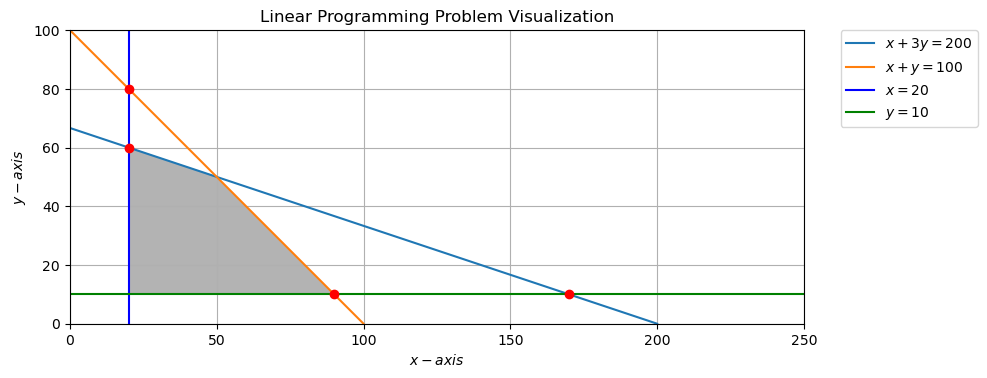

At point (50, 50): Z = 4000

Results:
Maximum value of Z is 4000
Optimal solution occurs at point (50, 50)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from math import ceil

# Define the meshgrid
d = np.linspace(0, 250, 3000)
x, y = np.meshgrid(d, d)

# Define the inequalities
inequality1 = (y <= (200 - x)/3)     # x + 3y <= 200
inequality2 = (y <= 100 - x)         # x + y <= 100
inequality3 = (x >= 20)              # x >= 20
inequality4 = (y >= 10)              # y >= 10

# Plot lines
plt.figure(figsize=(10, 8))

# Line 1: x + 3y = 200
x1 = [0, 200]
y1 = [200/3, 0]
plt.plot(x1, y1, label="$x+3y=200$")

# Line 2: x + y = 100
x2 = [0, 100]
y2 = [100, 0]
plt.plot(x2, y2, label="$x+y=100$")

# Line 3: x = 20 (vertical line)
plt.axvline(x=20, color='b', label="$x=20$")

# Line 4: y = 10 (horizontal line)
plt.axhline(y=10, color='g', label="$y=10$")

# Plot the feasible region
plt.imshow((inequality1 & inequality2 & inequality3 & inequality4).astype(int),
           extent=(d.min(), d.max(), d.min(), d.max()),
           origin="lower", cmap="Greys", alpha=0.3)

# Find intersection points
line1 = LineString([(0, 200/3), (200, 0)])  # x + 3y = 200
line2 = LineString([(0, 100), (100, 0)])    # x + y = 100
line3 = LineString([(20, 0), (20, 200)])    # x = 20
line4 = LineString([(0, 10), (200, 10)])    # y = 10

# Get all intersection points
intersections = []

# Intersection of x + 3y = 200 and x = 20
int1 = line1.intersection(line2)
if not int1.is_empty:
    intersections.append((20, (200-20)/3))

# Intersection of x + 3y = 200 and y = 10
int2 = line1.intersection(line4)
if not int2.is_empty:
    intersections.append((200-30, 10))

# Intersection of x + y = 100 and x = 20
int3 = line2.intersection(line3)
if not int3.is_empty:
    intersections.append((20, 80))

# Intersection of x + y = 100 and y = 10
int4 = line2.intersection(line4)
if not int4.is_empty:
    intersections.append((90, 10))

# Plot intersection points
for point in intersections:
    plt.plot(point[0], point[1], 'ro')

plt.xlim(0, 250)
plt.ylim(0, 100)
plt.xlabel(r'$x - axis$')
plt.ylabel(r'$y - axis$')
plt.title('Linear Programming Problem Visualization')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

# Calculate Z value at each corner point
z_values = []
p,q=int1.xy
points=[(ceil(p[0]),int(q[0]))]
for point in points:

    
    z = 30*point[0] + 50*point[1]
    z_values.append((z, point))
    print(f"At point {point}: Z = {z}")

# Find the maximum Z value and its corresponding point
max_z, max_point = max(z_values, key=lambda item: item[0])

print('\nResults:')
print(f'Maximum value of Z is {max_z}')
print(f'Optimal solution occurs at point {max_point}')

### Asg 2: North West Corner Method

In [5]:

tot_chg = 0

def northwest_corner_rule(supply, demand):
    global tot_chg
    m, n = len(supply), len(demand)
    allocation = np.zeros((m, n))
    i, j = 0, 0
    
    while i < m and j < n:
        quantity = min(supply[i], demand[j])
        allocation[i][j] = quantity
        supply[i] -= quantity
        demand[j] -= quantity
        tot_chg += 1
        if supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1
    
    return allocation

def calculate_cost(allocation, cost_matrix):
    return np.sum(allocation * cost_matrix)

def solve_transportation_problem(supply, demand, cost_matrix):
    print("Supply:", supply)
    print("Demand:", demand)
    print("\nCost matrix:")
    print(cost_matrix)
    
    allocation = northwest_corner_rule(supply.copy(), demand.copy())
    
    print("\nAllocation matrix:")
    print(allocation)
    
    total_cost = calculate_cost(allocation, cost_matrix)
    print(f"\nTotal transportation cost: {total_cost}")
    return allocation, total_cost

def get_user_input():
    # Get number of supply values and then the values
    num_supply = int(input("Enter the number of supply values: "))
    supply_input = input("Enter supply values separated by spaces: ")
    supply = np.array([int(x) for x in supply_input.split()])
    
    if len(supply) != num_supply:
        print("Error: Number of supply values does not match the specified count.")
        return None, None, None

    # Get number of demand values and then the values
    num_demand = int(input("Enter the number of demand values: "))
    demand_input = input("Enter demand values separated by spaces: ")
    demand = np.array([int(x) for x in demand_input.split()])
    
    if len(demand) != num_demand:
        print("Error: Number of demand values does not match the specified count.")
        return None, None, None

    # Get cost matrix input
    print("Enter cost matrix values row by row:")
    cost_matrix = []
    for i in range(len(supply)):
        row_input = input(f"Enter values for row {i+1} separated by spaces: ")
        row = [int(x) for x in row_input.split()]
        if len(row) != len(demand):
            print("Error: Row length does not match the number of demand values.")
            return None, None, None
        cost_matrix.append(row)
    cost_matrix = np.array(cost_matrix)

    return supply, demand, cost_matrix

def balance_problem(supply, demand, cost_matrix):
    total_supply = np.sum(supply)
    total_demand = np.sum(demand)
    
    if total_supply == total_demand:
        print("The problem is already balanced.")
    elif total_supply > total_demand:
        print("Total supply exceeds total demand. Adding a dummy column.")
        difference = total_supply - total_demand
        demand = np.append(demand, difference)
        dummy_column = np.zeros((len(supply), 1))
        cost_matrix = np.hstack((cost_matrix, dummy_column))
    else:  # total_demand > total_supply
        print("Total demand exceeds total supply. Adding a dummy row.")
        difference = total_demand - total_supply
        supply = np.append(supply, difference)
        dummy_row = np.zeros((1, len(demand)))
        cost_matrix = np.vstack((cost_matrix, dummy_row))
    
    print("Balanced supply:", supply)
    print("Balanced demand:", demand)
    print("Balanced cost matrix:")
    print(cost_matrix)
    
    return supply, demand, cost_matrix

def check_degeneracy(supply, demand, allocation):
    non_degenerate_condition = len(supply) + len(demand) - 1
    occupied_cells = np.count_nonzero(allocation)
    
    if occupied_cells == non_degenerate_condition:
        print(f"Non-degenerated: {occupied_cells} = {non_degenerate_condition}")
    else:
        print("Degenerated: Not enough occupied cells.")
        
def main():
    supply, demand, cost_matrix = get_user_input()
    if supply is None or demand is None or cost_matrix is None:
        print("Invalid input. Exiting.")
        return

    supply, demand, cost_matrix = balance_problem(supply, demand, cost_matrix)
    allocation, total_cost = solve_transportation_problem(supply, demand, cost_matrix)
    check_degeneracy(supply, demand, allocation)

if __name__ == "__main__":
    main()


Enter the number of supply values:  3
Enter supply values separated by spaces:  12 11 13
Enter the number of demand values:  4
Enter demand values separated by spaces:  6 11 13 10


Enter cost matrix values row by row:


Enter values for row 1 separated by spaces:  4 5 4 7
Enter values for row 2 separated by spaces:  2 5 8 3
Enter values for row 3 separated by spaces:  6 2 3 4


Total demand exceeds total supply. Adding a dummy row.
Balanced supply: [12 11 13  4]
Balanced demand: [ 6 11 13 10]
Balanced cost matrix:
[[4. 5. 4. 7.]
 [2. 5. 8. 3.]
 [6. 2. 3. 4.]
 [0. 0. 0. 0.]]
Supply: [12 11 13  4]
Demand: [ 6 11 13 10]

Cost matrix:
[[4. 5. 4. 7.]
 [2. 5. 8. 3.]
 [6. 2. 3. 4.]
 [0. 0. 0. 0.]]

Allocation matrix:
[[6. 6. 0. 0.]
 [0. 5. 6. 0.]
 [0. 0. 7. 6.]
 [0. 0. 0. 4.]]

Total transportation cost: 172.0
Non-degenerated: 7 = 7


### Asg 3: Least Cost Cell Method 

In [4]:
import numpy as np
def get_inputs():
    m = int(input("Total number of Supply constraints: "))
    n = int(input("Total number of Demand constraints: "))
    
    costs = np.zeros((m, n))
    for i in range(m):
        row_input = input(f"Enter values for row {i+1} separated by spaces: ")
        costs[i] = list(map(int, row_input.split()))
    
    supply = list(map(int, input("Enter the supply values: ").split()))
    demand = list(map(int, input("Enter the demand values: ").split()))
    
    return m, n, costs, supply, demand

def balance_problem(m, n, costs, supply, demand):
    total_supply = sum(supply)
    total_demand = sum(demand)
    
    original_shape = (m, n)  # Store original problem dimensions
    
    if total_supply > total_demand:
        n += 1
        demand.append(total_supply - total_demand)
        costs = np.column_stack((costs, np.zeros(m)))
    elif total_demand > total_supply:
        m += 1
        supply.append(total_demand - total_supply)
        costs = np.vstack((costs, np.zeros(n)))
    
    return m, n, costs, supply, demand, original_shape

def least_cost_method(m, n, costs, supply, demand):
    allocation = np.zeros((m, n))
    cost_matrix = costs.copy()
    
    while np.sum(supply) > 0 and np.sum(demand) > 0:
        min_cost = np.inf
        min_i, min_j = -1, -1
        
        for i in range(m):
            for j in range(n):
                if cost_matrix[i][j] < min_cost and supply[i] > 0 and demand[j] > 0:
                    min_cost = cost_matrix[i][j]
                    min_i, min_j = i, j
        
        if min_i == -1 or min_j == -1:
            break
        
        quantity = min(supply[min_i], demand[min_j])
        allocation[min_i][min_j] = quantity
        supply[min_i] -= quantity
        demand[min_j] -= quantity
        
        if supply[min_i] == 0:
            cost_matrix[min_i, :] = np.inf
        if demand[min_j] == 0:
            cost_matrix[:, min_j] = np.inf
    
    return allocation

def check_degeneracy(m, n, allocation):
    allocated_cells = np.count_nonzero(allocation)
    required_cells = m + n - 1
    
    if allocated_cells < required_cells:
        print("The solution is degenerate.")
        print(f"Allocated cells: {allocated_cells}")
        print(f"Required cells: {required_cells}")
    else:
        print("The solution is non-degenerate.")

def calculate_total_cost(costs, allocation, original_shape):
    # Only use the original dimensions for cost calculation
    orig_m, orig_n = original_shape
    # print(orig_m)
    # print(orig_n)
    orig_costs = costs[:orig_m, :orig_n]
    orig_allocation = allocation[:orig_m, :orig_n]
    return np.sum(orig_costs * orig_allocation)

def find_loop(allocation, start_i, start_j):
    m, n = allocation.shape
    visited = set()
    stack = [(start_i, start_j, [])]

    while stack:
        i, j, path = stack.pop()
        if (i, j) in visited:
            continue
        visited.add((i, j))
        path = path + [(i, j)]

        if len(path) > 1 and (i, j) == (start_i, start_j):
            return path

        for jj in range(n):
            if jj != j and allocation[i][jj] > 0:
                stack.append((i, jj, path))
        
        for ii in range(m):
            if ii != i and allocation[ii][j] > 0:
                stack.append((ii, j, path))

    return None

def check_dependency(allocation):
    m, n = allocation.shape
    for i in range(m):
        for j in range(n):
            if allocation[i][j] > 0:
                loop = find_loop(allocation, i, j)
                if loop and len(loop) > 3:  # A loop needs at least 4 points
                    return True, loop
    return False, None

def main():
    m_i, n_i, costs, supply_i, demand_i = get_inputs()
    m, n, costs, supply, demand, original_shape = balance_problem(m_i, n_i, costs, supply_i, demand_i)
    original_shape=(m_i,n_i)
    print("\nBalanced Problem:")
    print("Costs:")
    print(costs)
    print("Supply:", supply)
    print("Demand:", demand)
    
    allocation = least_cost_method(m, n, costs, supply.copy(), demand.copy())
    
    print("\nInitial Allocation:")
    print(allocation)
    
    check_degeneracy(m, n, allocation)
    
    is_dependent, loop = check_dependency(allocation)
    if is_dependent:
        print("\nThe allocation is dependent. A loop was found:")
        print(loop)
    else:
        print("\nThe allocation is independent. No loops were found.")
    
    total_cost = calculate_total_cost(costs, allocation, original_shape)
    print(f"\nTotal transportation cost: {total_cost}")

if __name__ == "__main__":
    main()

# dependency meaning we can form a loop in the allocation matrix by taking the allocated cells as a corner point

Total number of Supply constraints:  3
Total number of Demand constraints:  4
Enter values for row 1 separated by spaces:  4 5 4 7
Enter values for row 2 separated by spaces:  2 5 8 3
Enter values for row 3 separated by spaces:  6 2 3 4
Enter the supply values:  12 11 13
Enter the demand values:  6 11 13 10



Balanced Problem:
Costs:
[[4. 5. 4. 7.]
 [2. 5. 8. 3.]
 [6. 2. 3. 4.]
 [0. 0. 0. 0.]]
Supply: [12, 11, 13, 4]
Demand: [6, 11, 13, 10]

Initial Allocation:
[[ 0.  0. 11.  1.]
 [ 2.  0.  0.  9.]
 [ 0. 11.  2.  0.]
 [ 4.  0.  0.  0.]]
The solution is non-degenerate.

The allocation is independent. No loops were found.

Total transportation cost: 110.0


### Asg 4: Voggel's Approximation Method

In [6]:
import numpy as np

def vogels_approximation_method(supply, demand, cost_matrix):
    m, n = len(supply), len(demand)
    allocation = np.zeros((m, n), dtype=int)
    t_change = 0
    
    while np.sum(supply) > 0 and np.sum(demand) > 0:
        # Calculate row and column penalties
        row_penalties = []
        for i in range(m):
            if supply[i] > 0:
                row_costs = [cost_matrix[i][j] for j in range(n) if demand[j] > 0]
                if len(row_costs) >= 2:
                    row_penalties.append(np.diff(np.partition(row_costs, 1)[:2])[0])
                elif len(row_costs) == 1:
                    row_penalties.append(row_costs[0])
                else:
                    row_penalties.append(0)
            else:
                row_penalties.append(-1)
        
        col_penalties = []
        for j in range(n):
            if demand[j] > 0:
                col_costs = [cost_matrix[i][j] for i in range(m) if supply[i] > 0]
                if len(col_costs) >= 2:
                    col_penalties.append(np.diff(np.partition(col_costs, 1)[:2])[0])
                elif len(col_costs) == 1:
                    col_penalties.append(col_costs[0])
                else:
                    col_penalties.append(0)
            else:
                col_penalties.append(-1)
        
        # Find the highest penalty
        max_row_penalty = max(row_penalties)
        max_col_penalty = max(col_penalties)
        
        if max_row_penalty >= max_col_penalty:
            i = row_penalties.index(max_row_penalty)
            j = min(range(n), key=lambda x: cost_matrix[i][x] if demand[x] > 0 else float('inf'))
        else:
            j = col_penalties.index(max_col_penalty)
            i = min(range(m), key=lambda x: cost_matrix[x][j] if supply[x] > 0 else float('inf'))
        
        # Allocate
        quantity = min(supply[i], demand[j])
        allocation[i][j] = quantity
        supply[i] -= quantity
        demand[j] -= quantity
        t_change += 1
    
    return allocation, t_change

def calculate_cost(allocation, cost_matrix):
    return np.sum(allocation * cost_matrix)

def solve_transportation_problem(supply, demand, cost_matrix):
    print("Supply:", supply.tolist())
    print("Demand:", demand.tolist())
    print("Cost Matrix:", cost_matrix.tolist())
    
    allocation, t_change = vogels_approximation_method(supply.copy(), demand.copy(), cost_matrix)
    print("Allocation Matrix:", allocation.tolist())
    
    total_cost = calculate_cost(allocation, cost_matrix)
    print("Total Cost:", total_cost)
    
    m, n = len(supply), len(demand)
    if t_change == (m + n - 1):
        print("Solution: Non-Degenerated")
    else:
        print("Solution: Degenerated")
    
    return allocation, total_cost

def get_user_input():
    m = int(input("Enter the number of supply points: "))
    supply_input = input(f"Enter {m} supply values separated by spaces: ")
    supply = np.array([int(x) for x in supply_input.split()])

    n = int(input("Enter the number of demand points: "))
    demand_input = input(f"Enter {n} demand values separated by spaces: ")
    demand = np.array([int(x) for x in demand_input.split()])

    print(f"Enter the cost matrix ({m}x{n}) row by row:")
    cost_matrix = []
    for i in range(m):
        row_input = input(f"Enter {n} values for row {i+1} separated by spaces: ")
        cost_matrix.append([int(x) for x in row_input.split()])
    cost_matrix = np.array(cost_matrix)

    return supply, demand, cost_matrix

def balance_problem(supply, demand, cost_matrix):
    total_supply = np.sum(supply)
    total_demand = np.sum(demand)
    
    if total_supply == total_demand:
        print("Problem is balanced")
    elif total_supply > total_demand:
        print("Adding dummy demand")
        difference = total_supply - total_demand
        demand = np.append(demand, difference)
        dummy_column = np.zeros((len(supply), 1), dtype=int)
        cost_matrix = np.hstack((cost_matrix, dummy_column))
    else:
        print("Adding dummy supply")
        difference = total_demand - total_supply
        supply = np.append(supply, difference)
        dummy_row = np.zeros((1, len(demand)), dtype=int)
        cost_matrix = np.vstack((cost_matrix, dummy_row))
    
    print("Balanced Supply:", supply.tolist())
    print("Balanced Demand:", demand.tolist())
    print("Balanced Cost Matrix:", cost_matrix.tolist())
    
    return supply, demand, cost_matrix

def main():
    supply, demand, cost_matrix = get_user_input()
    supply, demand, cost_matrix = balance_problem(supply, demand, cost_matrix)
    solve_transportation_problem(supply, demand, cost_matrix)

if __name__ == "__main__":
    main()

Enter the number of supply points:  3
Enter 3 supply values separated by spaces:  12 11 13
Enter the number of demand points:  4
Enter 4 demand values separated by spaces:  6 11 13 10


Enter the cost matrix (3x4) row by row:


Enter 4 values for row 1 separated by spaces:  4 5 4 7
Enter 4 values for row 2 separated by spaces:  2 5 8 3
Enter 4 values for row 3 separated by spaces:  6 2 3 4


Adding dummy supply
Balanced Supply: [12, 11, 13, 4]
Balanced Demand: [6, 11, 13, 10]
Balanced Cost Matrix: [[4, 5, 4, 7], [2, 5, 8, 3], [6, 2, 3, 4], [0, 0, 0, 0]]
Supply: [12, 11, 13, 4]
Demand: [6, 11, 13, 10]
Cost Matrix: [[4, 5, 4, 7], [2, 5, 8, 3], [6, 2, 3, 4], [0, 0, 0, 0]]
Allocation Matrix: [[0, 0, 9, 3], [6, 0, 0, 5], [0, 11, 0, 2], [0, 0, 4, 0]]
Total Cost: 114
Solution: Non-Degenerated


### Asg 5: Modi Method

In [11]:
import numpy as np

def calculate_u_v_values(basic_feasible_solution, cost_matrix):
    num_sources = len(cost_matrix)
    num_destinations = len(cost_matrix[0])
    u_values = [None] * num_sources
    v_values = [None] * num_destinations
    u_values[0] = 0
    
    bfs_copy = basic_feasible_solution.copy()
    while len(bfs_copy) > 0:
        for index, (position, value) in enumerate(bfs_copy):
            i, j = position
            if u_values[i] is None and v_values[j] is None:
                continue
            
            cost = cost_matrix[i][j]
            if u_values[i] is None:
                u_values[i] = cost - v_values[j]
            else:
                v_values[j] = cost - u_values[i]
            bfs_copy.pop(index)
            break
    
    return u_values, v_values

def calculate_opportunity_costs(basic_feasible_solution, cost_matrix, u_values, v_values):
    opportunity_costs = []
    for i, row in enumerate(cost_matrix):
        for j, cost in enumerate(row):
            is_non_basic = all([pos != (i, j) for pos, val in basic_feasible_solution])
            if is_non_basic:
                opportunity_cost = u_values[i] + v_values[j] - cost
                opportunity_costs.append(((i, j), opportunity_cost))
    
    return opportunity_costs

def can_improve_solution(opportunity_costs):
    return any(cost > 0 for _, cost in opportunity_costs)

def get_entering_variable(opportunity_costs):
    return max(opportunity_costs, key=lambda x: x[1])[0]

def get_loop(basic_variable_positions, entering_variable_position):
    def find_loop(current_loop):
        if len(current_loop) > 3:
            can_close_loop = len(get_next_possible_positions(current_loop, [entering_variable_position])) == 1
            if can_close_loop:
                return current_loop
        
        unvisited = list(set(basic_variable_positions) - set(current_loop))
        next_possible_positions = get_next_possible_positions(current_loop, unvisited)
        for next_pos in next_possible_positions:
            new_loop = find_loop(current_loop + [next_pos])
            if new_loop:
                return new_loop
    
    return find_loop([entering_variable_position])

def get_next_possible_positions(loop, unvisited):
    last_pos = loop[-1]
    same_row = [pos for pos in unvisited if pos[0] == last_pos[0]]
    same_col = [pos for pos in unvisited if pos[1] == last_pos[1]]
    if len(loop) < 2:
        return same_row + same_col
    else:
        prev_pos = loop[-2]
        row_move = prev_pos[0] == last_pos[0]
        return same_col if row_move else same_row

def pivot_loop(basic_feasible_solution, loop):
    even_cells = loop[0::2]
    odd_cells = loop[1::2]
    get_allocation = lambda pos: next(val for p, val in basic_feasible_solution if p == pos)
    leaving_position = min(odd_cells, key=get_allocation)
    leaving_value = get_allocation(leaving_position)
    
    new_basic_feasible_solution = []
    for pos, val in [bv for bv in basic_feasible_solution if bv[0] != leaving_position] + [(loop[0], 0)]:
        if pos in even_cells:
            val += leaving_value
        elif pos in odd_cells:
            val -= leaving_value
        new_basic_feasible_solution.append((pos, val))
    
    return new_basic_feasible_solution

def modi_method(basic_feasible_solution, cost_matrix):
    while True:
        u_values, v_values = calculate_u_v_values(basic_feasible_solution, cost_matrix)
        opportunity_costs = calculate_opportunity_costs(basic_feasible_solution, cost_matrix, u_values, v_values)
        
        if not can_improve_solution(opportunity_costs):
            return basic_feasible_solution
        
        entering_variable = get_entering_variable(opportunity_costs)
        loop = get_loop([pos for pos, _ in basic_feasible_solution], entering_variable)
        basic_feasible_solution = pivot_loop(basic_feasible_solution, loop)

def get_total_cost(cost_matrix, allocation_matrix):
    return np.sum(np.multiply(cost_matrix, allocation_matrix))

def print_matrix(matrix, title):
    print(f"\n{title}:")
    for row in matrix:
        print(" ".join(f"{cell:4}" for cell in row))

def get_matrix_input(num_rows, num_cols, prompt):
    print(f"\n{prompt}")
    return [list(map(int, input(f"Enter row {i+1} values separated by spaces: ").split())) for i in range(num_rows)]

def main():
    num_sources = int(input("Enter the number of sources: "))
    supply = list(map(int, input("Enter the supply values separated by spaces: ").split()))
    
    num_destinations = int(input("Enter the number of destinations: "))
    demand = list(map(int, input("Enter the demand values separated by spaces: ").split()))
    
    cost_matrix = get_matrix_input(num_sources, num_destinations, "Enter the cost matrix:")
    allocation_matrix = get_matrix_input(num_sources, num_destinations, "Enter the initial allocation matrix:")
    
    cost_matrix = np.array(cost_matrix)
    allocation_matrix = np.array(allocation_matrix)
    
    print_matrix(cost_matrix, "Cost Matrix")
    print_matrix(allocation_matrix, "Initial Allocation Matrix")
    print(f"\nSupply: {supply}")
    print(f"Demand: {demand}")
    print(f"\nInitial Total Cost: {get_total_cost(cost_matrix, allocation_matrix)}")
    
    basic_feasible_solution = [
        ((i, j), allocation_matrix[i][j])
        for i in range(num_sources)
        for j in range(num_destinations)
        if allocation_matrix[i][j] > 0
    ]
    
    optimal_solution = modi_method(basic_feasible_solution, cost_matrix)
    
    optimal_allocation = np.zeros_like(allocation_matrix)
    for (i, j), value in optimal_solution:
        optimal_allocation[i][j] = value
    
    print_matrix(optimal_allocation, "Optimal Allocation Matrix")
    print(f"\nOptimal Total Cost: {get_total_cost(cost_matrix, optimal_allocation)}")

if __name__ == "__main__":
    main()


Enter the number of sources:  3
Enter the supply values separated by spaces:  12 11 13
Enter the number of destinations:  4
Enter the demand values separated by spaces:  6 11 13 10



Enter the cost matrix:


Enter row 1 values separated by spaces:  4 5 4 7
Enter row 2 values separated by spaces:  2 5 8 3
Enter row 3 values separated by spaces:  6 2 3 4



Enter the initial allocation matrix:


Enter row 1 values separated by spaces:  6 6 0 0
Enter row 2 values separated by spaces:  0 5 6 0
Enter row 3 values separated by spaces:  0 0 0 6



Cost Matrix:
   4    5    4    7
   2    5    8    3
   6    2    3    4

Initial Allocation Matrix:
   6    6    0    0
   0    5    6    0
   0    0    0    6

Supply: [12, 11, 13]
Demand: [6, 11, 13, 10]

Initial Total Cost: 151


KeyboardInterrupt: 

### Asg 6: Modi Method (Degenerate)

#### using vogel's approximation

In [19]:
import numpy as np

def vogels_approximation_method(cost, supply, demand):
    total_supply = sum(supply)
    total_demand = sum(demand)
    
    if total_supply < total_demand:
        supply.append(total_demand - total_supply)
        cost.append([0] * len(demand))
    elif total_demand < total_supply:
        demand.append(total_supply - total_demand)
        for i in cost:
            i.append(0)

    cost = np.array(cost)
    supply = np.array(supply)
    demand = np.array(demand)
    total_cost = 0
    num_rows = len(supply)
    num_cols = len(demand)
    allocation_matrix = [[0] * num_cols for _ in range(num_rows)]

    while supply.sum() > 0 and demand.sum() > 0:
        row_diff = []
        col_diff = []

        for i in range(len(supply)):
            row = sorted(cost[i])
            if len(row) > 1:
                row_diff.append(row[1] - row[0])
            else:
                row_diff.append(np.inf)

        for j in range(len(demand)):
            col = sorted(cost[:, j])
            if len(col) > 1:
                col_diff.append(col[1] - col[0])
            else:
                col_diff.append(np.inf)

        row_max = max(row_diff)
        col_max = max(col_diff)

        if row_max >= col_max:
            row_index = row_diff.index(row_max)
            col_index = np.argmin(cost[row_index])
        else:
            col_index = col_diff.index(col_max)
            row_index = np.argmin(cost[:, col_index])

        allocation = min(supply[row_index], demand[col_index])
        total_cost += allocation * cost[row_index, col_index]
        allocation_matrix[row_index][col_index] = allocation
        supply[row_index] -= allocation
        demand[col_index] -= allocation

        if supply[row_index] == 0:
            cost[row_index, :] = 10000000
        if demand[col_index] == 0:
            cost[:, col_index] = 10000000

    print("Allocation Matrix")
    for i in range(len(allocation_matrix)):
        for j in range(len(allocation_matrix[i])):
            print(allocation_matrix[i][j], end=' ')
        print("\n")
    
    return total_cost, allocation_matrix

def handle_degeneracy(bfs, supply, demand):
    m = len(supply)
    n = len(demand)
    required_bfs_count = m + n - 1
    if len(bfs) < required_bfs_count:
        while len(bfs) < required_bfs_count:
            for i in range(m):
                for j in range(n):
                    if all([p != (i, j) for p, v in bfs]):
                        bfs.append(((i, j), 0))
                        break
    return bfs

def vogel(supply, demand, costs):
    supply_copy = supply.copy()
    demand_copy = demand.copy()
    m = len(supply)
    n = len(demand)
    bfs = []
    i, j = 0, 0

    while len(bfs) < m + n - 1:
        s = supply_copy[i]
        d = demand_copy[j]
        v = min(s, d)
        supply_copy[i] -= v
        demand_copy[j] -= v
        bfs.append(((i, j), v))

        if supply_copy[i] == 0 and i < m - 1:
            i += 1
        elif demand_copy[j] == 0 and j < n - 1:
            j += 1

    bfs = handle_degeneracy(bfs, supply, demand)
    return bfs

def get_balanced(supply, demand, costs, penalties=None):
    total_supply = sum(supply)
    total_demand = sum(demand)

    if total_supply < total_demand:
        if penalties is None:
            raise Exception('Supply less than demand, penalties required')
        new_supply = supply + [total_demand - total_supply]
        new_costs = costs + [penalties]
        return new_supply, demand, new_costs
    elif total_supply > total_demand:
        new_demand = demand + [total_supply - total_demand]
        new_costs = [row + [0] for row in costs]
        return supply, new_demand, new_costs

    return supply, demand, costs

def get_total_cost(costs, ans):
    total_cost = 0
    for i, row in enumerate(costs):
        for j, cost in enumerate(row):
            total_cost += cost * ans[i][j]
    return total_cost

def get_us_and_vs(bfs, costs):
    us = [None] * len(costs)
    vs = [None] * len(costs[0])
    us[0] = 0
    bfs_copy = bfs.copy()

    while len(bfs_copy) > 0:
        for index, bv in enumerate(bfs_copy):
            i, j = bv[0]
            if us[i] is None and vs[j] is None:
                continue
            cost = costs[i][j]
            if us[i] is None:
                us[i] = cost - vs[j]
            else:
                vs[j] = cost - us[i]
            bfs_copy.pop(index)
            break
    return us, vs

def get_ws(bfs, costs, us, vs):
    ws = []
    for i, row in enumerate(costs):
        for j, cost in enumerate(row):
            non_basic = all([p[0] != i or p[1] != j for p, v in bfs])
            if non_basic:
                ws.append(((i, j), us[i] + vs[j] - cost))
    return ws

def can_be_improved(ws):
    return any(v > 0 for p, v in ws)

def get_entering_variable_position(ws):
    return max(ws, key=lambda w: w[1])[0]

def get_possible_next_nodes(loop, not_visited):
    last_node = loop[-1]
    nodes_in_row = [n for n in not_visited if n[0] == last_node[0]]
    nodes_in_column = [n for n in not_visited if n[1] == last_node[1]]

    if len(loop) < 2:
        return nodes_in_row + nodes_in_column
    else:
        prev_node = loop[-2]
        row_move = prev_node[0] == last_node[0]
        if row_move:
            return nodes_in_column
        return nodes_in_row

def get_loop(bv_positions, ev_position):
    def inner(loop):
        if len(loop) > 3:
            can_be_closed = len(get_possible_next_nodes(loop, [ev_position])) == 1
            if can_be_closed:
                return loop
        not_visited = list(set(bv_positions) - set(loop))
        possible_next_nodes = get_possible_next_nodes(loop, not_visited)
        for next_node in possible_next_nodes:
            new_loop = inner(loop + [next_node])
            if new_loop:
                return new_loop
    return inner([ev_position])

def loop_pivoting(bfs, loop):
    even_cells = loop[0::2]
    odd_cells = loop[1::2]
    get_bv = lambda pos: next(v for p, v in bfs if p == pos)
    leaving_position = sorted(odd_cells, key=get_bv)[0]
    leaving_value = get_bv(leaving_position)
    new_bfs = []
    for p, v in [bv for bv in bfs if bv[0] != leaving_position] + [(loop[0], 0)]:
        if p in even_cells:
            v += leaving_value
        elif p in odd_cells:
            v -= leaving_value
        new_bfs.append((p, v))
    return new_bfs

def modi_method(costs, supply, demand):
    balanced_supply, balanced_demand, balanced_costs = get_balanced(supply, demand, costs)
    bfs = vogel(balanced_supply, balanced_demand, balanced_costs)

    while True:
        us, vs = get_us_and_vs(bfs, balanced_costs)
        ws = get_ws(bfs, balanced_costs, us, vs)
        if not can_be_improved(ws):
            break
        ev_position = get_entering_variable_position(ws)
        loop = get_loop([p for p, v in bfs], ev_position)
        bfs = loop_pivoting(bfs, loop)

    ans = np.zeros((len(costs), len(costs[0])))
    for (i, j), v in bfs:
        ans[i][j] = int(v)
    return ans

def main():
    rows = int(input("Enter the number of rows (supplies): "))
    cols = int(input("Enter the number of columns (demands): "))

    print("Enter the cost matrix row by row (separated by space):")
    cost = []
    for i in range(rows):
        row = list(map(int, input(f"Row {i+1}: ").split()))
        cost.append(row)

    print("Enter the supply values (separated by space):")
    supply = list(map(int, input().split()))

    print("Enter the demand values (separated by space):")
    demand = list(map(int, input().split()))

    if sum(supply) != sum(demand):
        print("Not Balanced")
    else:
        print("Balanced")

    total_cost, allocation_matrix = vogels_approximation_method(cost, supply, demand)
    print(f"Initial Basic Feasible Solution (IBFS) using Vogel's Approximation Method: {total_cost}")

    ans = modi_method(cost, supply, demand)
    print("Optimal solution using MODI's method:")
    print(ans)
    optimal_cost = sum(sum(np.multiply(cost, ans)))
    print(f"Total optimal cost: {optimal_cost}")

if __name__ == "__main__":
    main()
# cost = [[5, 8, 6, 6, 3], [4, 7, 7, 6, 5], [8, 4, 6, 6, 4]]
# supply = [8, 5, 9]
# demand = [4, 4, 5, 4, 8]

# if sum(supply) != sum(demand):
#     print("Not Balanced")
# else:
#     print("balanced")

# print("IBFS:", vogels_approximation_method(cost, supply, demand)[0])
# print(f"cost{cost}")
# print(f"supply{supply}")
# print(f"demand{demand}")
# ans = modi_method(cost, supply, demand)
# print("Optimal solution using MODI's method:")
# print(ans)
# print("Total optimal cost:", get_total_cost(cost, ans))


Enter the number of rows (supplies):  3
Enter the number of columns (demands):  4


Enter the cost matrix row by row (separated by space):


Row 1:  4 5 4 7
Row 2:  2 5 8 3
Row 3:  6 2 3 4


Enter the supply values (separated by space):


 12 11 13


Enter the demand values (separated by space):


 6 11 13 10


Not Balanced
Allocation Matrix
0 0 9 3 

6 0 0 5 

0 11 0 2 

0 0 4 0 

Initial Basic Feasible Solution (IBFS) using Vogel's Approximation Method: 114
Optimal solution using MODI's method:
[[ 1.  0. 11.  0.]
 [ 5.  0.  0.  6.]
 [ 0. 11.  2.  0.]
 [ 0.  0.  0.  4.]]
Total optimal cost: 104.0


#### using nwcr

In [24]:
import numpy as np
from tabulate import tabulate

def north_west_corner_rule(supply, demand, costs):
    num_rows = len(supply)
    num_cols = len(demand)
    allocation_matrix = [[0] * num_cols for _ in range(num_rows)]
    bfs = []
    total_cost = 0
    i, j = 0, 0

    # North West Corner Rule allocation
    while i < num_rows and j < num_cols:
        # Allocate the minimum of supply or demand
        allocation = min(supply[i], demand[j])
        allocation_matrix[i][j] = allocation
        bfs.append(((i, j), allocation))
        current_cost = allocation * costs[i][j]
        total_cost += current_cost

        # Adjust supply and demand after allocation
        supply[i] -= allocation
        demand[j] -= allocation

        # Move to the next cell based on remaining supply and demand
        if supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1

    # Display the allocation matrix
    print("\nAllocation Matrix:")
    headers = [f'Demand {i+1}' for i in range(num_cols)]
    print(tabulate(allocation_matrix, headers, tablefmt="grid", colalign=("center",) * num_cols))
    print(f"\nTotal Transportation Cost (Initial Basic Feasible Solution) using NWCR: {total_cost}")
    return bfs

def modi_method(costs, supply, demand):
    # Calculate the initial BFS using the NWCR method
    balanced_supply, balanced_demand, balanced_costs = get_balanced(supply, demand, costs)
    bfs = north_west_corner_rule(balanced_supply.copy(), balanced_demand.copy(), balanced_costs)
    
    while True:
        us, vs = get_us_and_vs(bfs, balanced_costs)
        ws = get_ws(bfs, balanced_costs, us, vs)
        if not can_be_improved(ws):
            break
        ev_position = get_entering_variable_position(ws)
        loop = get_loop([p for p, v in bfs], ev_position)
        bfs = loop_pivoting(bfs, loop)

    # Create the optimal solution matrix with the correct dimensions
    ans = np.zeros((len(balanced_costs), len(balanced_costs[0])))
    for (i, j), v in bfs:
        ans[i][j] = int(v)
    
    print("\nOptimal solution using MODI's method:")
    headers = [f'Demand {i+1}' for i in range(len(balanced_demand))]
    num_cols = len(ans[0])
    print(tabulate(ans, headers, tablefmt="grid", colalign=("center",) * num_cols))
    return ans

def get_balanced(supply, demand, costs):
    total_supply = sum(supply)
    total_demand = sum(demand)

    if total_supply < total_demand:
        # Add a dummy row with zero costs to balance the problem
        new_supply = supply + [total_demand - total_supply]
        new_costs = costs + [[0] * len(demand)]
        return new_supply, demand, new_costs
    elif total_supply > total_demand:
        # Add a dummy column with zero costs to balance the problem
        new_demand = demand + [total_supply - total_demand]
        new_costs = costs + [[0] * (len(demand) + 1) for _ in range(len(supply))]
        return supply, new_demand, new_costs
    else:
        return supply, demand, costs

def get_total_cost(costs, ans):
    total_cost = 0
    for i, row in enumerate(costs):
        for j, cost in enumerate(row):
            total_cost += cost * ans[i][j]
    return total_cost
 
def get_us_and_vs(bfs, costs): 
    us = [None] * len(costs) 
    vs = [None] * len(costs[0]) 
    us[0] = 0 
    bfs_copy = bfs.copy() 
 
    while len(bfs_copy) > 0: 
        for index, bv in enumerate(bfs_copy): 
            i, j = bv[0] 
            if us[i] is None and vs[j] is None: 
                continue 
            cost = costs[i][j] 
            if us[i] is None: 
                us[i] = cost - vs[j] 
            else: 
                vs[j] = cost - us[i] 
            bfs_copy.pop(index) 
            break 
    return us, vs 
 
def get_ws(bfs, costs, us, vs): 
    ws = [] 
    for i, row in enumerate(costs): 
        for j, cost in enumerate(row): 
            non_basic = all([p[0] != i or p[1] != j for p, v in bfs]) 
            if non_basic: 
                ws.append(((i, j), us[i] + vs[j] - cost)) 
    return ws 
 
def can_be_improved(ws): 
    return any(v > 0 for p, v in ws) 
 
def get_entering_variable_position(ws): 
    return max(ws, key=lambda w: w[1])[0] 
 
def get_possible_next_nodes(loop, not_visited): 
    last_node = loop[-1] 
    nodes_in_row = [n for n in not_visited if n[0] == last_node[0]] 
    nodes_in_column = [n for n in not_visited if n[1] == last_node[1]] 
    if len(loop) < 2: 
        return nodes_in_row + nodes_in_column 
    else: 
        prev_node = loop[-2] 
        row_move = prev_node[0] == last_node[0] 
        if row_move: 
            return nodes_in_column 
        return nodes_in_row 
 
def get_loop(bv_positions, ev_position): 
    def inner(loop): 
        if len(loop) > 3: 
            can_be_closed = len(get_possible_next_nodes(loop, [ev_position])) == 1 
            if can_be_closed: 
                return loop 
        not_visited = list(set(bv_positions) - set(loop)) 
        possible_next_nodes = get_possible_next_nodes(loop, not_visited) 
        for next_node in possible_next_nodes: 
            new_loop = inner(loop + [next_node]) 
            if new_loop: 
                return new_loop 
    return inner([ev_position]) 
 
def loop_pivoting(bfs, loop): 
    even_cells = loop[0::2] 
    odd_cells = loop[1::2] 
    get_bv = lambda pos: next(v for p, v in bfs if p == pos) 
    leaving_position = sorted(odd_cells, key=get_bv)[0] 
    leaving_value = get_bv(leaving_position) 
    new_bfs = [] 
    for p, v in [bv for bv in bfs if bv[0] != leaving_position] + [(loop[0], 0)]: 
        if p in even_cells: 
            v += leaving_value 
        elif p in odd_cells: 
            v -= leaving_value 
        new_bfs.append((p, v)) 
    return new_bfs 

if __name__ == "__main__":
    rows = int(input("Enter the number of rows (supplies): "))
    cols = int(input("Enter the number of columns (demands): "))
    print("Enter the cost matrix row by row (separated by space):")
    cost = []
    for i in range(rows):
        row = list(map(int, input(f"Row {i+1}: ").split()))
        cost.append(row)
    print("Enter the supply values (separated by space):")
    supply = list(map(int, input().split()))
    print("Enter the demand values (separated by space):")
    demand = list(map(int, input().split()))
    
    if sum(supply) != sum(demand):
        print("\nNot Balanced")
    else:
        print("\nBalanced")
        
        # Directly call MODI's method which internally calls NWCR
    print("\n--- Applying NWCR and MODI's Method to find the Optimal Solution ---")
    ans = modi_method(cost, supply, demand)
    optimal_cost = get_total_cost(cost, ans)
    print(f"\nTotal optimal cost: {optimal_cost}")

Enter the number of rows (supplies):  3
Enter the number of columns (demands):  4


Enter the cost matrix row by row (separated by space):


Row 1:  23 27 16 18
Row 2:  12 17 20 51
Row 3:  22 28 12 32


Enter the supply values (separated by space):


 30 40 53


Enter the demand values (separated by space):


 22 35 25 41



Balanced

--- Applying NWCR and MODI's Method to find the Optimal Solution ---

Allocation Matrix:
+------------+------------+------------+------------+
|  Demand 1  |  Demand 2  |  Demand 3  |  Demand 4  |
+============+============+============+============+
|     22     |     8      |     0      |     0      |
+------------+------------+------------+------------+
|     0      |     27     |     13     |     0      |
+------------+------------+------------+------------+
|     0      |     0      |     12     |     41     |
+------------+------------+------------+------------+

Total Transportation Cost (Initial Basic Feasible Solution) using NWCR: 2897

Optimal solution using MODI's method:
+------------+------------+------------+------------+
|  Demand 1  |  Demand 2  |  Demand 3  |  Demand 4  |
+============+============+============+============+
|     0      |     0      |     0      |     30     |
+------------+------------+------------+------------+
|     5      |     35     |

### Asg 7: Assignment problem using Hungarian Method

In [14]:
## import numpy as np

def min_zero_row(zero_mat, mark_zero):
	min_row = [99999, -1]
	for row_num in range(zero_mat.shape[0]): 
		if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
			min_row = [np.sum(zero_mat[row_num] == True), row_num]
	zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
	mark_zero.append((min_row[1], zero_index))
	zero_mat[min_row[1], :] = False
	zero_mat[:, zero_index] = False

def mark_matrix(mat):
	cur_mat = mat
	zero_bool_mat = (cur_mat == 0)
	zero_bool_mat_copy = zero_bool_mat.copy()
	marked_zero = []
	while (True in zero_bool_mat_copy):
		min_zero_row(zero_bool_mat_copy, marked_zero)
	marked_zero_row = []
	marked_zero_col = []
	for i in range(len(marked_zero)):
		marked_zero_row.append(marked_zero[i][0])
		marked_zero_col.append(marked_zero[i][1])
	non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))
	marked_cols = []
	check_switch = True
	while check_switch:
		check_switch = False
		for i in range(len(non_marked_row)):
			row_array = zero_bool_mat[non_marked_row[i], :]
			for j in range(row_array.shape[0]):
				if row_array[j] == True and j not in marked_cols:
					marked_cols.append(j)
					check_switch = True
		for row_num, col_num in marked_zero:
			if row_num not in non_marked_row and col_num in marked_cols:
				non_marked_row.append(row_num)
				check_switch = True
	marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))
	return(marked_zero, marked_rows, marked_cols)

def adjust_matrix(mat, cover_rows, cover_cols):
	cur_mat = mat
	non_zero_element = []
	for row in range(len(cur_mat)):
		if row not in cover_rows:
			for i in range(len(cur_mat[row])):
				if i not in cover_cols:
					non_zero_element.append(cur_mat[row][i])
	min_num = min(non_zero_element)
	for row in range(len(cur_mat)):
		if row not in cover_rows:
			for i in range(len(cur_mat[row])):
				if i not in cover_cols:
					cur_mat[row, i] = cur_mat[row, i] - min_num
	for row in range(len(cover_rows)):  
		for col in range(len(cover_cols)):
			cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num
	return cur_mat

def hungarian_algorithm(mat): 
	dim = mat.shape[0]
	cur_mat = mat
	for row_num in range(mat.shape[0]): 
		cur_mat[row_num] = cur_mat[row_num] - np.min(cur_mat[row_num])
	for col_num in range(mat.shape[1]): 
		cur_mat[:,col_num] = cur_mat[:,col_num] - np.min(cur_mat[:,col_num])
	zero_count = 0
	while zero_count < dim:
		ans_pos, marked_rows, marked_cols = mark_matrix(cur_mat)
		zero_count = len(marked_rows) + len(marked_cols)
		if zero_count < dim:
			cur_mat = adjust_matrix(cur_mat, marked_rows, marked_cols)
	return ans_pos

def ans_calculation(mat, pos):
	total = 0
	fill_value = 0
	ans_mat = np.full((mat.shape[0], mat.shape[1]), fill_value)
	for i in range(len(pos)):
		total += mat[pos[i][0], pos[i][1]]
		ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
	return total, ans_mat


def print_matrix_with_labels(matrix, is_allocation=False):
    rows = matrix.shape[0]
    row_labels = [chr(65 + i) for i in range(rows)]
    cols = matrix.shape[1]
    col_labels = [f'J{i+1}' for i in range(cols)]
    
    print('   ', end='')
    for col in col_labels:
        print(f'{col:3}', end='')
    print()
    
    for i, row_label in enumerate(row_labels):
        print(f'{row_label:2}', end='')
        for value in matrix[i]:
            if is_allocation and value > 0:
                print('  X', end='')
            else:
                print(f'{value:3.0f}', end='')
        print()

def main():
    n = int(input("Enter the number of Jobs: "))
    m = int(input("Enter the number of Machines: "))
    if m==n:
        print("Given problem is balanced\n")
    else: print("Given problem is not balanced\n")
    matrix_rows = []
    print("Enter the values for cost matrix.\n")
    for i in range(n):
        row = input(f"Enter cost values for row {i+1} separated by spaces: ")
        row_values = list(map(int, row.split()))
        matrix_rows.append(row_values)

    cost_matrix = np.array(matrix_rows)

    print("\nCost Matrix:")
    print_matrix_with_labels(cost_matrix)

    if n < m:
        dummy_rows = m - n
        dummy_data = np.zeros((dummy_rows, m))
        cost_matrix = np.vstack((cost_matrix, dummy_data))
    elif n > m:
        dummy_cols = n - m
        dummy_data = np.zeros((n, dummy_cols))
        cost_matrix = np.hstack((cost_matrix, dummy_data))

    ans_pos = hungarian_algorithm(cost_matrix.copy())
    ans, ans_mat = ans_calculation(cost_matrix, ans_pos)

    print("\nOptimal Assignment Matrix:")
    print_matrix_with_labels(ans_mat, is_allocation=True)
    print(f"\nTotal Cost: {ans:.0f}")

if __name__ == '__main__':
    main()


Enter the number of Jobs:  3
Enter the number of Machines:  4


Given problem is not balanced

Enter the values for cost matrix.



Enter cost values for row 1 separated by spaces:  12 7 9 8
Enter cost values for row 2 separated by spaces:  8 7 6 10
Enter cost values for row 3 separated by spaces:  10 6 8 9



Cost Matrix:
   J1 J2 J3 J4 
A  12  7  9  8
B   8  7  6 10
C  10  6  8  9

Optimal Assignment Matrix:
   J1 J2 J3 J4 
A   0  0  0  X
B   0  0  X  0
C   0  X  0  0
D   0  0  0  0

Total Cost: 20


### Asg 8: TSP using Hungarian Method

In [24]:
labels = []

def calculatePathWeight(path, graph):
    total_weight = 0
    for i in range(len(path) - 1):
        total_weight += graph[path[i]][path[i + 1]]
    total_weight += graph[path[-1]][path[0]]
    return total_weight

def index_to_label(index):
    return labels[index]

def convert_indices_to_labels(indices):
    return [index_to_label(index) for index in indices]

def print_matrix_with_labels(graph):
    print("\nDistance Matrix:")
    print("      ", end="")
    for label in labels:
        print(f"{label:4}", end="")
    print()
    
    print("   ", end="")
    print("-" * (4 * len(labels)))
    
    for i, row in enumerate(graph):
        print(f"{labels[i]} |", end="")
        for value in row:
            print(f"{value:4}", end="")
        print()
    print()

def travellingSalesmanProblem(graph):
    V = len(graph)
    vertices = list(range(V))
    min_path_weight = float('inf')
    min_path = []
    
    def generate_permutations(arr, i):
        if i == len(arr):
            nonlocal min_path_weight, min_path
            path_weight = calculatePathWeight(arr, graph)
            if path_weight < min_path_weight:
                min_path_weight = path_weight
                min_path = arr[:]
        else:
            for j in range(i, len(arr)):
                arr[i], arr[j] = arr[j], arr[i]
                generate_permutations(arr, i + 1)
                arr[i], arr[j] = arr[j], arr[i]
    
    generate_permutations(vertices, 0)
    return min_path, min_path_weight

def main():
    V = int(input("Enter the number of cities: "))
    
    for i in range(V):
        labels.append(chr(ord('A') + i))
    
    graph = []
    print("\nEnter the distance between cities (space-separated values):")
    print("Enter 0 for same city and -1 if no direct path exists")
    for i in range(V):
        print(f"Enter distances from city {labels[i]}: ", end="")
        row = list(map(int, input().split()))
        graph.append(row)
    
    print_matrix_with_labels(graph)
    
    min_path, min_path_weight = travellingSalesmanProblem(graph)
    
    min_path = convert_indices_to_labels(min_path)
    
    print("Minimum Travelling cost:", min_path_weight)
    print("Optimal Travelling plan:")
    for i in range(len(min_path) - 1):
        print(min_path[i], "->", min_path[i + 1])
    print(min_path[-1], "->", min_path[0])

if __name__ == "__main__":
    main()

Enter the number of cities:  4



Enter the distance between cities (space-separated values):
Enter 0 for same city and -1 if no direct path exists
Enter distances from city A: 

 0 4 9 5


Enter distances from city B: 

 6 0 4 8


Enter distances from city C: 

 9 4 0 9


Enter distances from city D: 

 5 8 9 0



Distance Matrix:
      A   B   C   D   
   ----------------
A |   0   4   9   5
B |   6   0   4   8
C |   9   4   0   9
D |   5   8   9   0

Minimum Travelling cost: 22
Optimal Travelling plan:
A -> B
B -> C
C -> D
D -> A
